In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import os

from torchvision.models import ResNet18_Weights, resnet18
from tqdm.notebook import tqdm
from torchvision import datasets, transforms

#from src.imagenet_x.evaluate import ImageNetX, get_vanilla_transform
from src.imagenet_x import FACTORS, plots
from src.imagenet_x import get_factor_accuracies, error_ratio
from src.imagenet_x.utils import load_model_predictions, get_annotation_path

import pickle
from pathlib import Path

In [5]:
get_annotation_path()

PosixPath('/mnt/c/users/juliu/OneDrive/DTU/bachelor/bachelor_project/src/imagenet_x/annotations')

In [6]:
dfRes = pd.read_csv('Predictions/resnet18.csv')

In [7]:
dfnames= dfRes['file_name']

In [8]:
dfDino = pd.read_csv('Predictions/Dino.csv').merge(dfnames,on='file_name', how='inner')
dfDino.to_csv('Predictions/MDino.csv', index=False)

In [9]:
dfSimCLR = pd.read_csv('Predictions/50kSIMCLR.csv').merge(dfnames,on='file_name', how='inner')
dfSimCLR.to_csv('Predictions/MSIMCLR.csv', index=False)

In [10]:
dfVit = pd.read_csv('Predictions/Vit.csv').merge(dfnames,on='file_name', how='inner')
dfVit.to_csv('Predictions/mVit.csv', index=False)

In [11]:
dfFilenames = pd.read_csv('Predictions/filename_label.csv').merge(dfnames,on='file_name', how='inner')

FileNotFoundError: [Errno 2] No such file or directory: 'Predictions/filename_label.csv'

In [ ]:
dfFilenames.to_csv('Mfilename_labels.csv')

In [2]:
models, top_1_accs = load_model_predictions('predictionsplot')

                              predicted_class  predicted_probability
file_name                                                           
ILSVRC2012_val_00000293.JPEG                0               0.955444
ILSVRC2012_val_00002138.JPEG                0               0.849932
ILSVRC2012_val_00003014.JPEG                0               0.770029
ILSVRC2012_val_00006697.JPEG                0               0.999258
ILSVRC2012_val_00007197.JPEG                0               0.999018
...                                       ...                    ...
ILSVRC2012_val_00044368.JPEG              905               0.279522
ILSVRC2012_val_00045266.JPEG              999               0.640452
ILSVRC2012_val_00046353.JPEG              406               0.164186
ILSVRC2012_val_00047144.JPEG              333               0.988710
ILSVRC2012_val_00049174.JPEG              700               0.265507

[48868 rows x 2 columns]
                              predicted_class  predicted_probability
file_nam

In [3]:
top_1_accs

DINO        0.768969
ResNet18    0.696611
SIMCLR      0.678133
ViT         0.810428
dtype: float64

In [4]:
factor_accs = get_factor_accuracies("predictionsplot/")

                              predicted_class  predicted_probability
file_name                                                           
ILSVRC2012_val_00000293.JPEG                0               0.955444
ILSVRC2012_val_00002138.JPEG                0               0.849932
ILSVRC2012_val_00003014.JPEG                0               0.770029
ILSVRC2012_val_00006697.JPEG                0               0.999258
ILSVRC2012_val_00007197.JPEG                0               0.999018
...                                       ...                    ...
ILSVRC2012_val_00044368.JPEG              905               0.279522
ILSVRC2012_val_00045266.JPEG              999               0.640452
ILSVRC2012_val_00046353.JPEG              406               0.164186
ILSVRC2012_val_00047144.JPEG              333               0.988710
ILSVRC2012_val_00049174.JPEG              700               0.265507

[48868 rows x 2 columns]
                              predicted_class  predicted_probability
file_nam

In [5]:
error_ratio = error_ratio(factor_accs)

In [6]:
from src.imagenet_x import plots

TypeError: 'Text' object is not callable

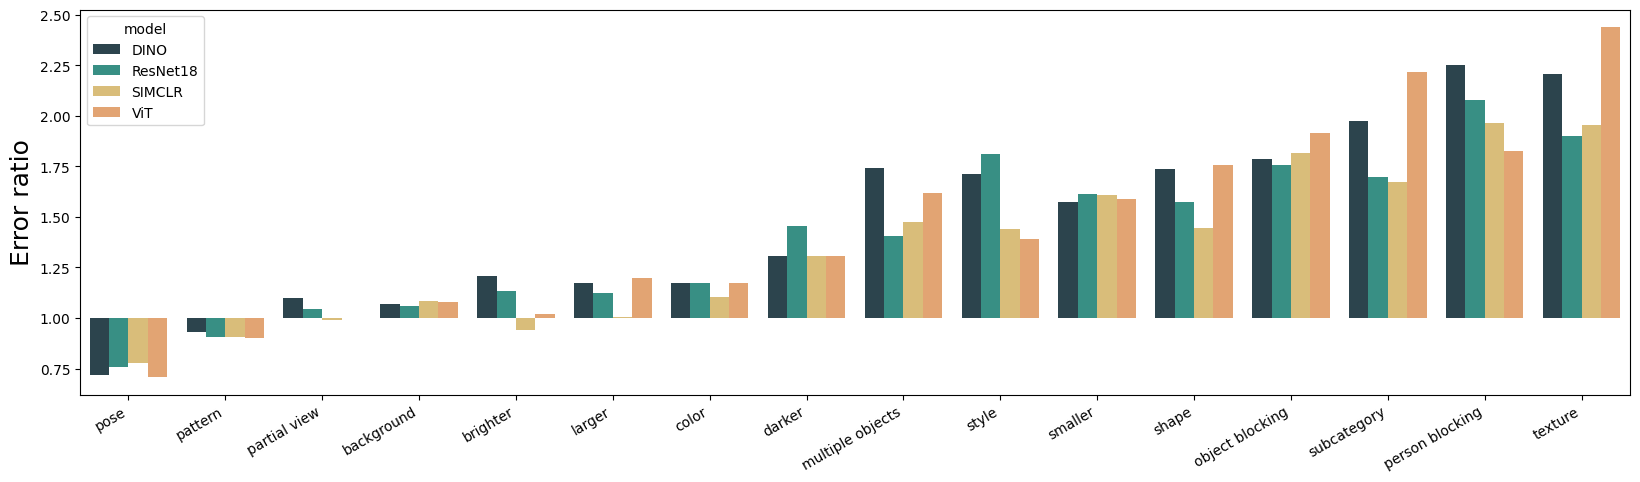

In [8]:
plots.set_color_palette()
plt = plots.model_comparison(factor_accs.reset_index())